<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predicted-vs-experimental-growth-rate" data-toc-modified-id="Predicted-vs-experimental-growth-rate-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predicted vs experimental growth rate</a></span></li><li><span><a href="#CO2-fixation" data-toc-modified-id="CO2-fixation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CO2 fixation</a></span></li><li><span><a href="#Tara-Oceans-samples-(Photoautotrophic,-Heterotrophic,-and-Mixotrophic-)" data-toc-modified-id="Tara-Oceans-samples-(Photoautotrophic,-Heterotrophic,-and-Mixotrophic-)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tara Oceans samples (Photoautotrophic, Heterotrophic, and Mixotrophic )</a></span></li><li><span><a href="#Global-distribution-of-different-trophic-modes-of-C.-closterium" data-toc-modified-id="Global-distribution-of-different-trophic-modes-of-C.-closterium-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Global distribution of different trophic modes of C. closterium</a></span></li><li><span><a href="#Differentially-abundant-marine-prokaryotes-between-different-trophic-modes-(LDA-score)" data-toc-modified-id="Differentially-abundant-marine-prokaryotes-between-different-trophic-modes-(LDA-score)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Differentially abundant marine prokaryotes between different trophic modes (LDA score)</a></span></li></ul></div>

In [73]:
# import packages needed
import pandas as pd
import numpy as np
from tqdm import tqdm
import geopandas as gpd
import requests
pd.options.mode.chained_assignment = None
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from jupyterthemes import jtplot
jtplot.style(theme='grade3', grid=False)

# Predicted vs experimental growth rate

In [74]:
df_expt_prdct_gr = pd.read_csv('growth_rates_experimental_insilico.csv', index_col=0)

In [75]:
df_expt_prdct_gr = df_expt_prdct_gr.sort_values(by='condition').reset_index(drop=True)
df_expt_prdct_gr.data_type =df_expt_prdct_gr.data_type.replace('prediction','In silico')
df_expt_prdct_gr.data_type =df_expt_prdct_gr.data_type.replace('expt','Experimental')

Text(0, 0.5, 'Growth rate (1/h)')

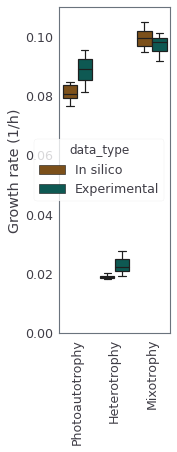

In [76]:
#plot
plt.figure(figsize=(2,6))
sns.boxplot(x="condition", y="gr",
            hue="data_type", 
            palette=["#8c510aff", "#01665eff"],
            data=df_expt_prdct_gr)
plt.ylim(0,0.11)
plt.xticks(ticks=np.arange(3),labels=['Photoautotrophy', 'Heterotrophy', 'Mixotrophy'],
          rotation=90)
#plt.yticks([])
plt.xlabel('')
plt.ylabel('Growth rate (1/h)')
#plt.legend(['Experimental', 'In silico'])
#plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('expt_vs_prediction_growth.svg')

# CO2 fixation

In [118]:
df_growth = pd.read_csv('co2_fixation.csv', index_col=0)

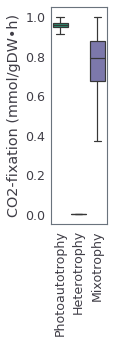

In [119]:
plt.figure(figsize=(1,4))

#flierprops = dict(markerfacecolor='0.90', markersize=5,linestyle='none')
ax = sns.boxplot(x="rxn", y="flux", data=df_growth, color='#2c7fb8',
                 palette=['#1b9e77ff','#d95f02ff','#7570b3ff'],
                 #flierprops=flierprops,
                showfliers=False)
plt.ylabel('CO2-fixation (mmol/gDW•h)')
plt.xticks(ticks=np.arange(3),labels=['Photoautotrophy', 'Heterotrophy', 'Mixotrophy'],
           rotation=90)
plt.xlabel('')
plt.rcParams['svg.fonttype'] = 'none'
#ax = sns.stripplot(x="rxn", y="flux", data=df_growth, color=".25", size=0.1)
#plt.savefig('auto_hetero_mixo_co2_fixation.svg')

# Tara Oceans samples (Photoautotrophic, Heterotrophic, and Mixotrophic )

In [79]:
# load data
list_auto = pd.read_csv('auto_samples.csv')['0'].to_list()
list_hetero = pd.read_csv('hetero_samples.csv')['0'].to_list()
list_mixo = pd.read_csv('mixo_samples.csv')['0'].to_list()

[33, 9, 39]


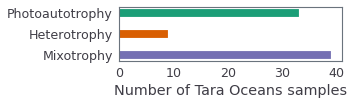

In [80]:
# plot number of reactions
labels = ['Photoautotrophy','Heterotrophy','Mixotrophy']
path_gene = [len(list_auto), len(list_hetero), len(list_mixo)]
print(path_gene)
                 
#path_nogene = list(df_up_down.n_inconsis)
width = 0.35       # the width of the bars: can also be len(x) sequence
fig, bax = plt.subplots(figsize=(4,1))
#bax.barh(labels, path_gene, width, label='Flux consistent with expression', color='#2c7fb8')
bax.barh(labels, path_gene, width, color=['#1b9e77ff','#d95f02ff','#7570b3ff'])

bax.set_yticks(np.arange(len(labels)))
bax.set_yticklabels(labels)
bax.invert_yaxis()
#bax.set_ylabel('Parameters')
bax.set_xlabel('Number of Tara Oceans samples')
#bax.set_title('Scores by group and gender')
#bax.legend(loc= 'lower right')
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('auto_hetero_mixo_tara_samples.svg')
plt.show()

# Global distribution of different trophic modes of C. closterium

In [93]:
df_meta_merg = pd.read_csv('sample_id_map_dict_location.csv', index_col=0)

In [95]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#df_meta_merg.type.unique()

In [96]:
# Create point geometries
geometry = gpd.points_from_xy(df_meta_merg.longitude, df_meta_merg.latitude)
geo_df = gpd.GeoDataFrame(df_meta_merg[['alt_sample', 'sample_id', 'meta', 'latitude', 
                                    'longitude', 'sample','type']], geometry=geometry)

geo_df.head()

,alt_sample,sample_id,meta,latitude,longitude,sample,type,geometry
0,7SRF,TARA_A200000113,MetaG,37.0510,1.9378,TARA_007SRF,mixo,POINT (1.93780 37.05100)
1,18DCM,TARA_S200000501,MetaG,35.7528,14.2765,TARA_018DCM,auto,POINT (14.27650 35.75280)
2,23DCM,TARA_E500000081,MetaG,42.1735,17.7252,TARA_023DCM,auto,POINT (17.72520 42.17350)
3,36DCM,TARA_B100000035,MetaG,20.8222,63.5133,TARA_036DCM,auto,POINT (63.51330 20.82220)
4,36SRF,TARA_Y100000015,MetaG,20.8183,63.5047,TARA_036SRF,mixo,POINT (63.50470 20.81830)


In [97]:
#geo_df['type'] = geo_df['type'].replace('auto', 'Photoautotrophy')
#geo_df['type'] = geo_df['type'].replace('hetero', 'Heterotrophy')
#geo_df['type'] = geo_df['type'].replace('mixo', 'Mixotrophy')

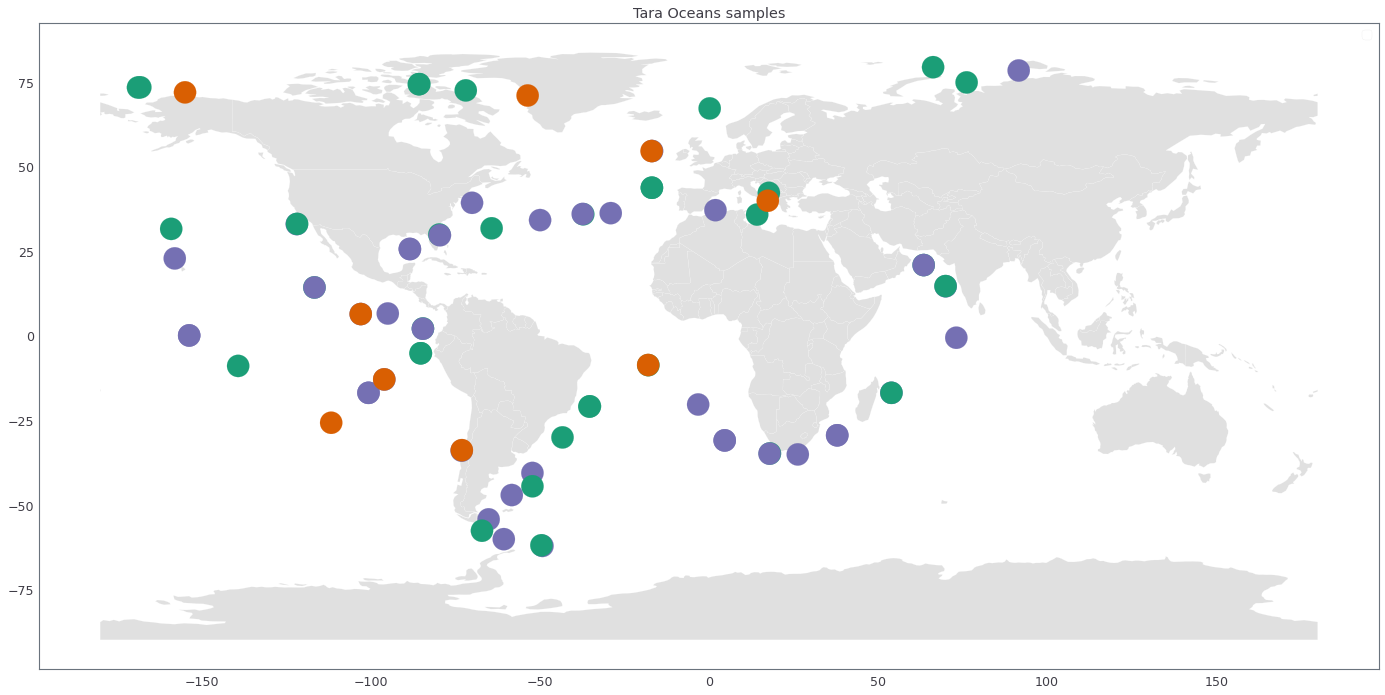

In [99]:
fig, ax = plt.subplots(figsize=(24,18))
world.plot(ax=ax, alpha=0.8, color='#d9d9d9', markersize=500)

cmp = ListedColormap(['#1b9e77', '#d95f02', '#7570b3'])

geo_df.plot(column='type', ax=ax, legend=True, markersize=500, cmap=cmp)
plt.title('Tara Oceans samples')
plt.legend('')
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('world_map_tara_samples.svg')

# Differentially abundant marine prokaryotes between different trophic modes (LDA score)

In [114]:
df_lda_top = pd.read_csv('/home/manish/google_drive_iitgn/manuscripts/cyl_virus/cyl_git/Fig6/lda_score.csv')

In [115]:
color_index = df_lda_top.trophic_condition
lut_row = {'auto': '#1b9e77',
 'hetero': '#d95f02',
  'mixo': '#7570b3'}
colors = color_index.map(lut_row)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


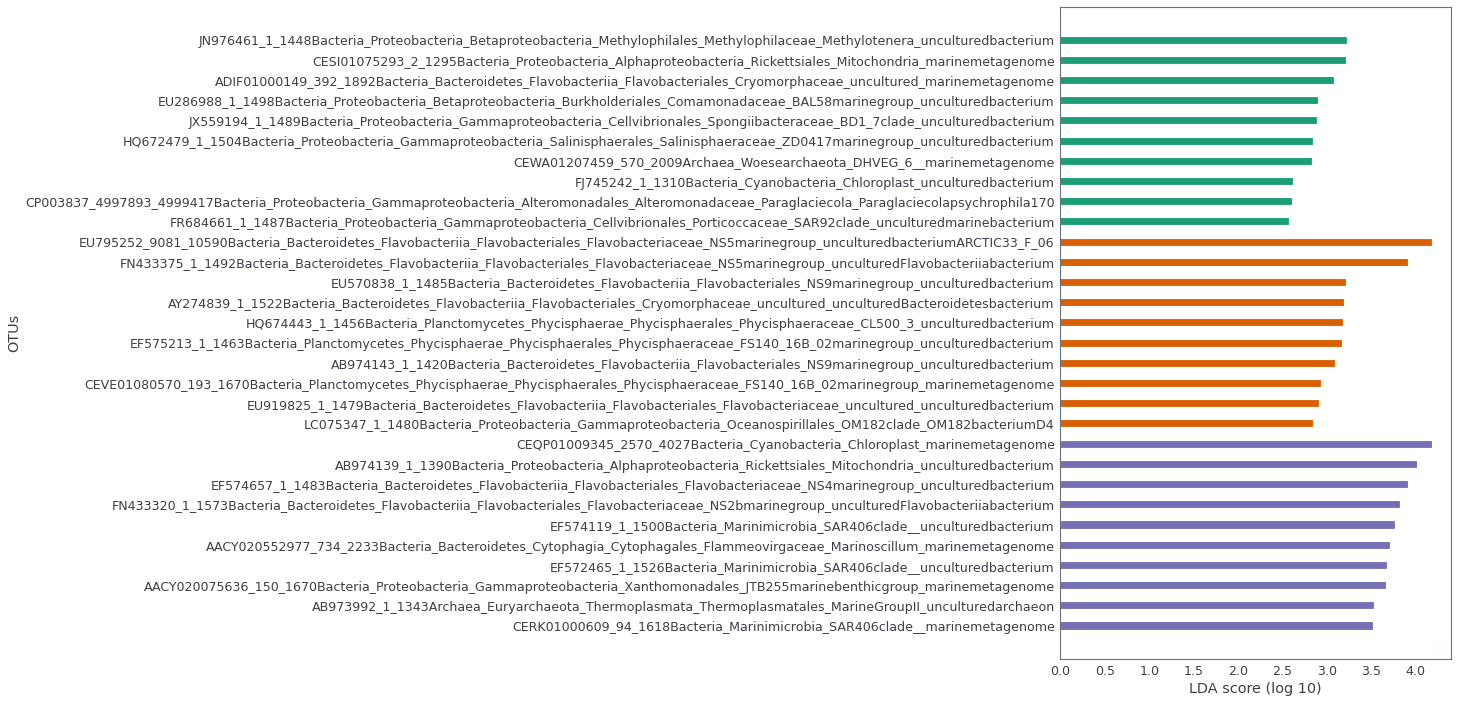

In [116]:
labels = list(df_lda_top.taxa)
path_gene = list(df_lda_top.lda_score)

width = 0.35       # the width of the bars: can also be len(x) sequence
fig, bax = plt.subplots(figsize=(7,12))
bax.barh(labels, path_gene, width, 
         #label='Photoautotrophy', 
         color=colors)

bax.set_yticks(np.arange(len(labels)))
bax.set_yticklabels(labels)
bax.invert_yaxis()
bax.set_ylabel('OTUs')
bax.set_xlabel('LDA score (log 10)')
#bax.set_title(parameter)
bax.legend(loc= 'lower right')
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('lda_scores_prok_top10.svg')

plt.show()